# Computer games market research

Purpose of analysis:
identify patterns that determine the success of computer games and gaming platforms in order to identify a potentially successful product and plan advertising campaigns in future periods.

Data:
historical data on the computer games market for the period up to 2016.
Data Description
Name - the name of the game
Platform - platform
Year_of_Release - year of release
Genre - game genre
NA_sales - sales in North America (millions of copies sold)
EU_sales - sales in Europe (millions of copies sold)
JP_sales - sales in Japan (millions of copies sold)
Other_sales - sales in other countries (millions of copies sold)
Critic_Score - critics' score (maximum 100)
User_Score - user rating (maximum 10)
Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.
Data for 2016 may be incomplete.


# General information about the data

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data=pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.columns=data.columns.str.lower()

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#анализируем пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data['name']=data['name'].fillna(0)
data['rating']=data['rating'].fillna(0)

In [9]:
#изучим значения в столбце user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')
data.loc[:,'year_of_release'] = data.loc[:,'year_of_release'].astype('Int64',errors='ignore')

In [11]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [12]:
#посчитаем продажи во всех регионах
data['total_sales']=(data['na_sales'])+(data['eu_sales'])+(data['jp_sales'])+(data['other_sales'])

In [13]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38


# Exploratory Data Analysis

## Game releases by year (from 1980 to 2016)

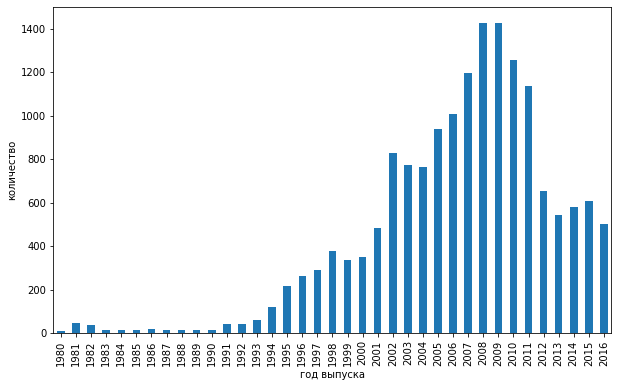

In [14]:
#узнаем сколько игр выпускалось в разные годы. year_of_release содержит 37 уникальных значений
data.groupby('year_of_release')['name'].count()\
.plot(kind='bar', figsize=(10,6), ylabel='количество', xlabel='год выпуска');

The most games were released in 2008-2009. Very few games were released before 1995; this data is not important for analysis. After 2011, there was a sharp drop in sales, which is likely due to the sharp increase in the popularity of mobile games.

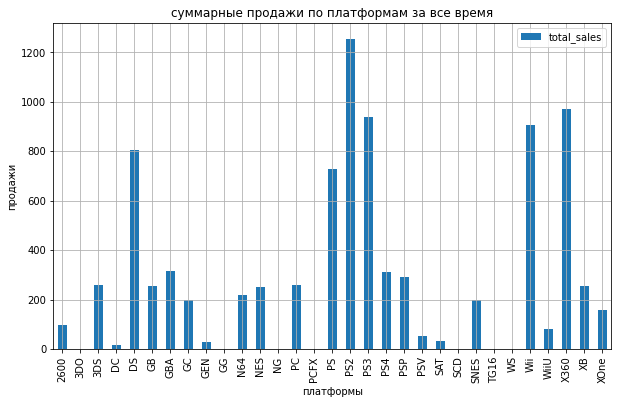

In [15]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.plot(kind='bar', grid=True, figsize=(10,6), ylabel='продажи', xlabel='платформы').set_title('суммарные продажи по платформам за все время');


### Setting the current period for analysis

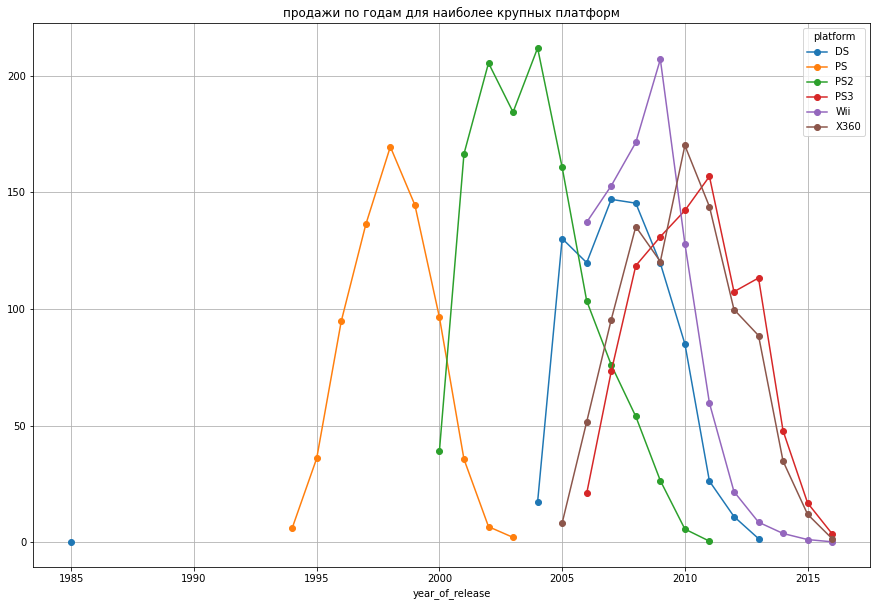

In [16]:
# Let's plot the distribution of sales by year for the largest platforms. 
data.query('platform=="DS" \
or platform=="PS" \
or platform=="PS2" \
or platform=="PS3" \
or platform=="Wii" \
or platform=="X360"')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
.plot(style='o-',  figsize=(15,10),grid=True).set_title('продажи по годам для наиболее крупных платформ');

The lifespan of the platforms is about 10 years. In addition, a significant change in the market in 2011-2012 is noticeable. Accordingly, the current period for analysis is the period from 2012.
To make a forecast for 2017, let’s take data for the previous 5 years:

In [17]:
actual_data=data.query('year_of_release>2011')

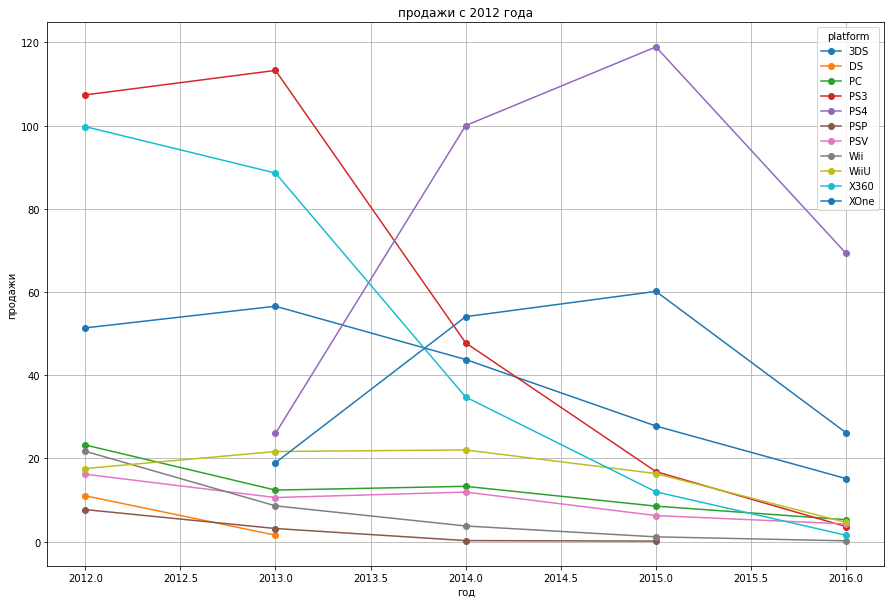

In [18]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
.plot(style='o-', figsize=(15,10),grid=True, ylabel='продажи', xlabel='год').set_title('продажи с 2012 года');

In the period 2013-2015, only two platforms showed sales growth - PS4 and XOne. In 2016, both platforms show a decrease in sales, but this may be due to incomplete data (for example, the study was probably conducted in mid-2016, and only takes into account half of potential sales), or to some feature of sales specifically in 2016. Considering that both platforms have not yet reached the age of 5 years - the half-life period of the platform, you can count on making a profit.

### Sales by platform (from 2012 to 2016)

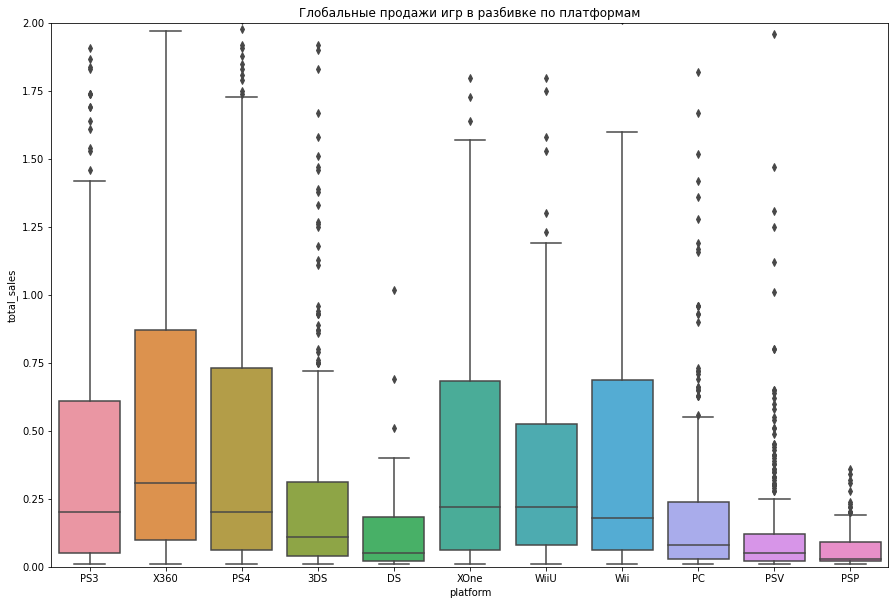

In [19]:
plt.figure(figsize=(15,10))
plt.ylim(0,2)
sb.boxplot(x=actual_data['platform'], y=actual_data['total_sales'])\
.set_title('Глобальные продажи игр в разбивке по платформам');



Based on the boxplots, we can conclude that game sales are distributed very unevenly, the distribution is asymmetrical and skewed towards large values, while the median values are similar on all popular platforms.

### The impact of reviews on sales

Let's study how reviews from users and critics affect sales inside the PS3.

Коэффициент корреляции  0.40656790206178095


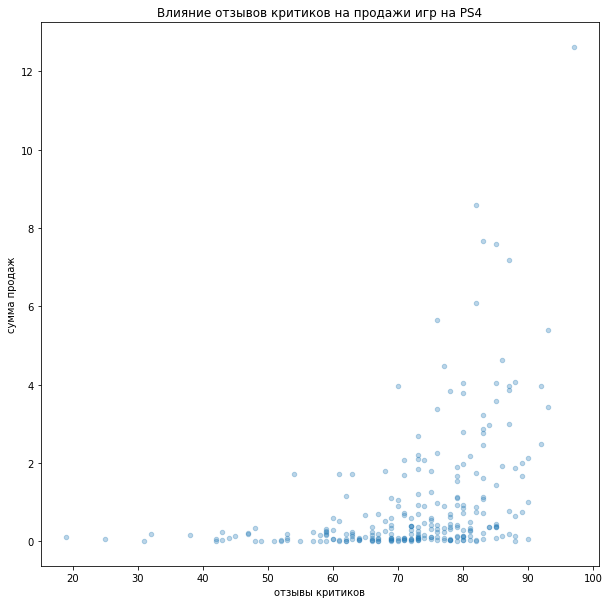

In [20]:
ps4=actual_data.query('platform=="PS4"')
ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,10), 
         alpha=0.3, ylabel=('сумма продаж'), xlabel=('отзывы критиков'))\
.set_title('Влияние отзывов критиков на продажи игр на PS4');
print('Коэффициент корреляции ',ps4['critic_score'].corr(ps4['total_sales']));

Коэффициент корреляции  -0.031957110204556376


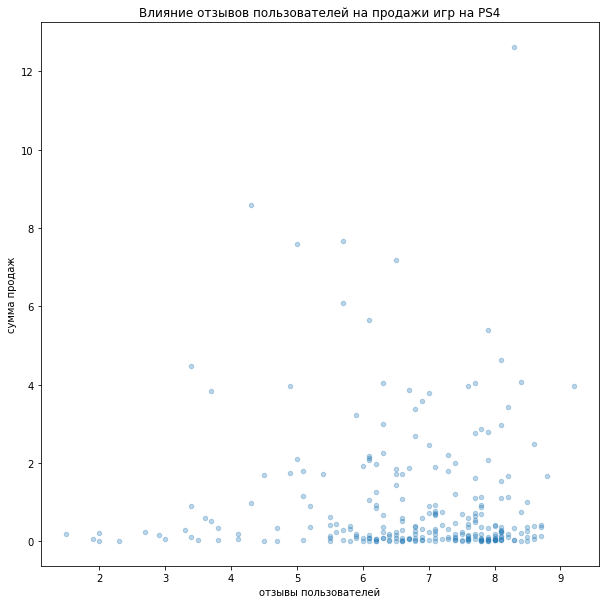

In [21]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3,
        ylabel=('сумма продаж'), xlabel=('отзывы пользователей'))\
.set_title('Влияние отзывов пользователей на продажи игр на PS4');
print('Коэффициент корреляции ',ps4['user_score'].corr(ps4['total_sales']));

We can conclude that reviews from critics show a positive correlation with sales, while user reviews do not affect sales.

Let's compare the results with two other popular platforms: XOne and X360

Коэффициент корреляции  0.4169983280084017


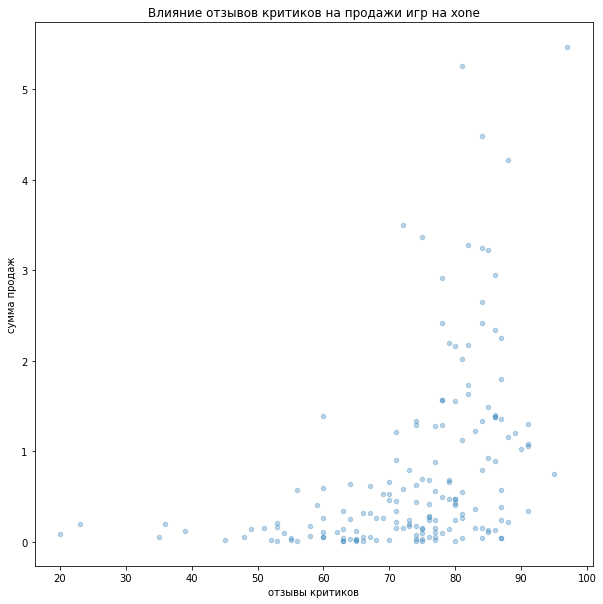

In [22]:
xone=actual_data.query('platform=="XOne"')
xone.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3,
          ylabel=('сумма продаж'), xlabel=('отзывы критиков'))\
.set_title('Влияние отзывов критиков на продажи игр на xone');
print('Коэффициент корреляции ',xone['critic_score'].corr(xone['total_sales']));

Коэффициент корреляции  -0.06892505328279414


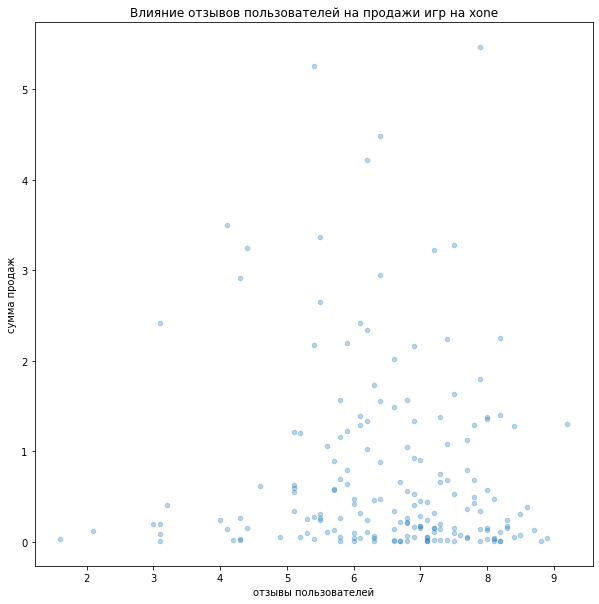

In [23]:
xone.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3,
         ylabel=('сумма продаж'), xlabel=('отзывы пользователей'))\
.set_title('Влияние отзывов пользователей на продажи игр на xone');
print('Коэффициент корреляции ',xone['user_score'].corr(xone['total_sales']));

Коэффициент корреляции  0.3605734888507336


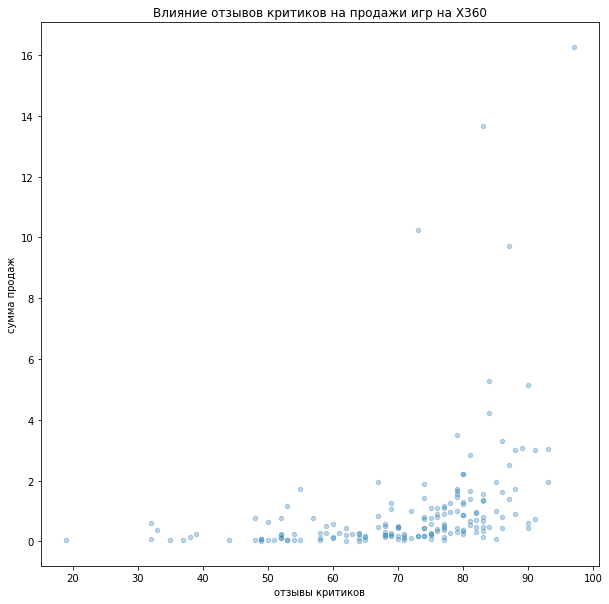

In [24]:
x360=actual_data.query('platform=="X360"')
x360.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3, 
          ylabel=('сумма продаж'), xlabel=('отзывы критиков'))\
.set_title('Влияние отзывов критиков на продажи игр на X360');
print('Коэффициент корреляции ',x360['critic_score'].corr(x360['total_sales']));

Коэффициент корреляции  0.006163978646213326


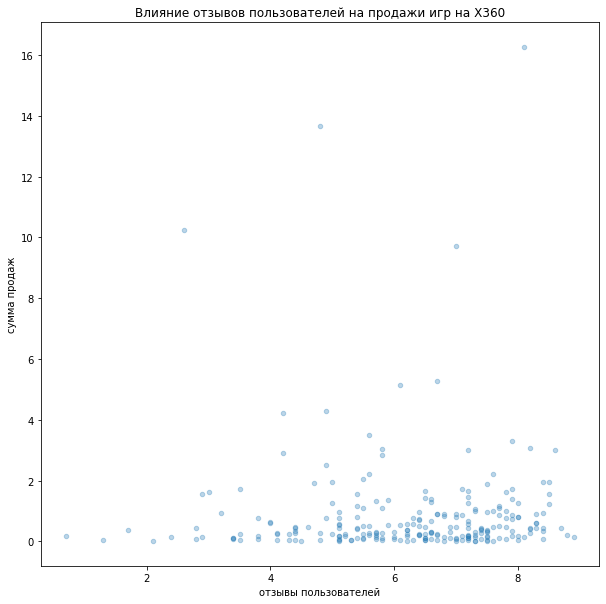

In [25]:
x360.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,10), alpha=0.3,
         ylabel=('сумма продаж'), xlabel=('отзывы пользователей')).set_title('Влияние отзывов пользователей на продажи игр на X360');
print('Коэффициент корреляции ',x360['user_score'].corr(x360['total_sales']));

In all cases, critic reviews correlate with sales, user reviews do not.

### The influence of genres on sales

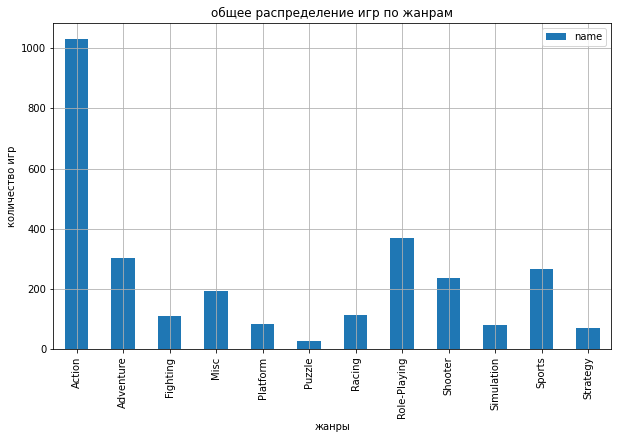

In [27]:
actual_data.pivot_table(index='genre', values='name', aggfunc='count')\
.plot(kind='bar', grid=True,figsize=(10,6), ylabel=('количество игр'), xlabel=('жанры')).set_title('общее распределение игр по жанрам');


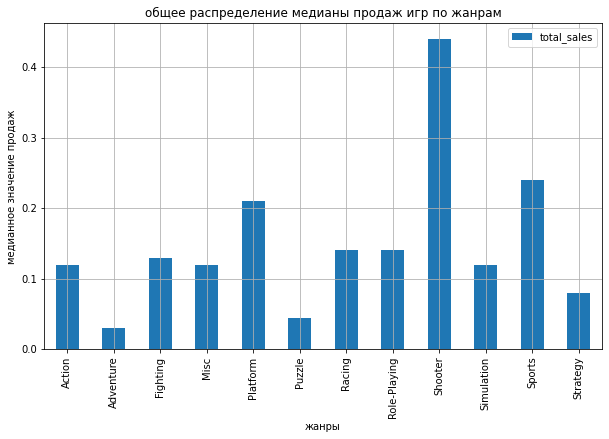

In [28]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.plot(kind='bar', grid=True, figsize=(10,6), ylabel=('медианное значение продаж'), xlabel=('жанры')).set_title('общее распределение медианы продаж игр по жанрам');


Больше всего игр выпускается в жанрах Action и Role-Playing. Медианные значения глобальных продаж близки в большинстве жанров. К наиболее прибыльным можно отнести Platform, Shooter, Sports. Наименее прибыльный жанр - Adventure.

## User portrait

### North America

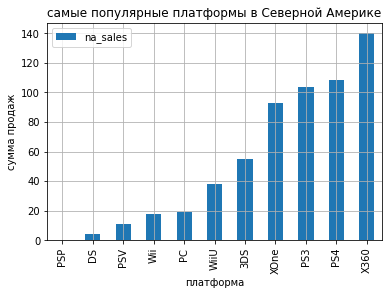

In [29]:
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values('na_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('платформа')).set_title('самые популярные платформы в Северной Америке');


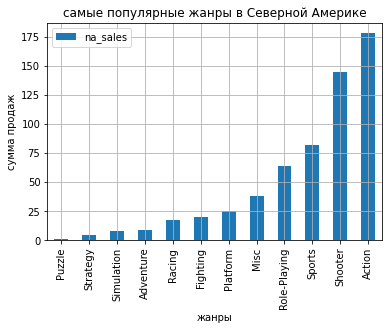

In [30]:
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values('na_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('жанры')).set_title('самые популярные жанры в Северной Америке');


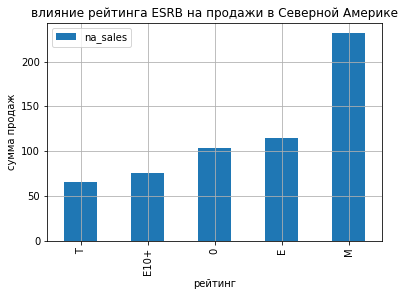

In [31]:
actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')\
.sort_values('na_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('рейтинг'))\
.set_title('влияние рейтинга ESRB на продажи в Северной Америке');


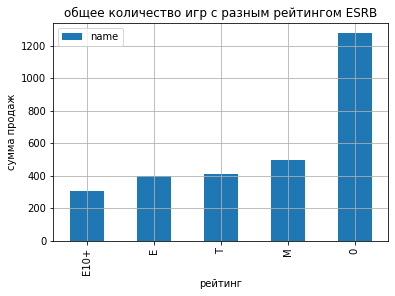

In [32]:
actual_data.pivot_table(index='rating', values='name', aggfunc='count')\
.sort_values('name').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('рейтинг'))\
.set_title('общее количество игр с разным рейтингом ESRB');


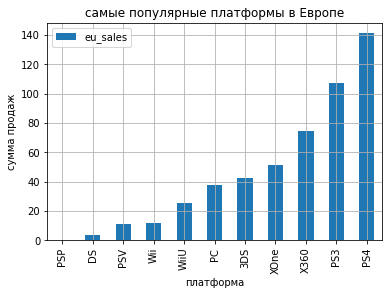

In [33]:
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('платформа'))\
.set_title('самые популярные платформы в Европе');


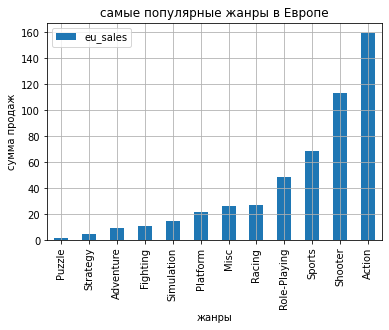

In [34]:
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('жанры'))\
.set_title('самые популярные жанры в Европе');


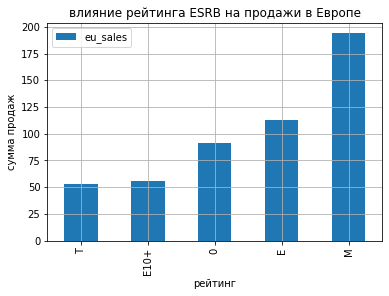

In [35]:
actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('рейтинг'))\
.set_title('влияние рейтинга ESRB на продажи в Европе');


### Japan (JP)

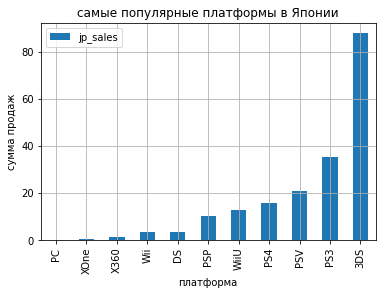

In [36]:
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('платформа'))\
.set_title('самые популярные платформы в Японии');


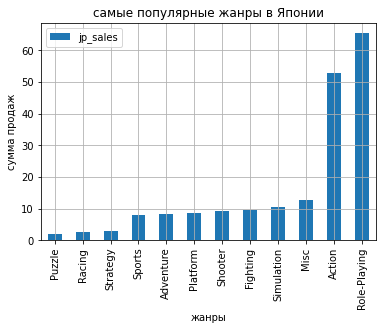

In [37]:
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('жанры'))\
.set_title('самые популярные жанры в Японии');


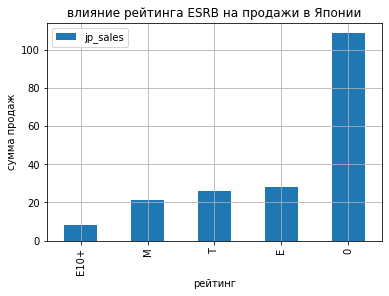

In [38]:
actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales').plot(kind='bar', grid=True, ylabel=('сумма продаж'), xlabel=('рейтинг'))\
.set_title('влияние рейтинга ESRB на продажи в Японии');


Распределение игр по жанрам похоже в США и Европе, наиболее популярными являются Action, Shooter и Sports, в Японии же наиболее популярным жанром являются Ролевые игры, и Action, все остальные имеют значительно меньшую долю  продаж. Вероятно это связано с культурными особенностями. Наиболее популярными платформами в США и Европе являются  X360, PS4, PS3. В Японии же более популярны 3DS,PS3 и PSV что очевидно, связано с выпуском более популярных в Японии ролевых игр на платформах PSV и 3DS. Присвоение рейтинга положительно влияет на продажи игр в США и Европе, наиболее покупаемыми являются игры с рейтингом М, в Японии же, наоборот, лидируют игры без рейтинга, что может быть связано с тем, что наиболее популярные здесь ролевые игры не имеют рейтинга.

##  Проверка гипотез
 

### 📊 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [39]:
Xone_score = actual_data.query('platform=="XOne"')['user_score'].dropna() 
PC_score = actual_data.query('platform=="PC"')['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(Xone_score, PC_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Вывод: при уровне стат значимости 0.05 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### 📊 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны

In [40]:
action_score = actual_data.query('genre=="Action"')['user_score'].dropna() 
sports_score = actual_data.query('genre=="Sports"')['user_score'].dropna()

alpha = 0.05 

results = st.ttest_ind(action_score, sports_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Вывод: при уровне стат значимости 0.05 средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Общий вывод по разделу

    Гипотеза о том, что средние пользовательские рейтинги Xbox One и PC одинаковые не была опровергнута.
    Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые была отвернута.

## Общий вывод

**Рынок компьютерных игр за весь период**

Активное развитие рынка компьютерных игр началось с 1992 года и рынок стабильно рос до 2009. В 2011 году видно резкое падение количества выпускаемых игр, что вероятно связано с резким взлетом рынка мобильных устройств.

"Срок жизни" игровой платформы составляет около 10 лет. Для платформ характерен  быстрый рост продаж и стремительное падение. Пик продаж приходится в среднем на 5 год жизни платформы. 

Для выявления закономерностей которые позволят делать прогнозы о развитии рынка компьютерных игр в будущих периодах был сужен период данных - 2012 - 2016 года.

**Рынок компьютерных игр с 2012 года**

Суммарно с 2012 по 2016 год тройка лидеров среди игровых платформ: PS4, PS3 и X360. Ожидается в ближайших периодах рост платформ XOne и PS4. Обе платформы появились в 2013 году. Если исходить из 10-летнего жизненного цикла платформы, то в следующие несколько лет обе платформы продолжат рост.

Больше всего игр выпускается в жанрах Action и Role-Playing. Медианные значения глобальных продаж близки в большинстве жанров. К наиболее прибыльным можно отнести Platform, Shooter, Sports. Наименее прибыльный жанр - Adventure.

Отличия в предпочтениях пользователей в зависимости от региона:

    Между рынками Северной Америки и Европы правктически нет отличий в портретах пльзователя.
    Существенно отличается рынок Японии. Здесь популярны совсем другие жанры, чем в Америке и Европе. На первом месте находится жанр Role_playing. Также отличается набор игровых платфом.


В наших данных выявлена связь между оценкой критиков и продажами, но нет связи между продажами и оценкой пользователей.

Также в ходе исследования были проверены 2 гипотезы:

    Гипотеза о том, что средние пользовательские рейтинги Xbox One и PC одинаковые не была опровергнута.
    Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые была отвернута.

